In [1]:
# Add a node
# Link nodes via an edge
# Delete a node and related children
# Update a Node
# Update an Edge
# Delete an Edge

import networkx as nx

In [2]:
from syft.core.node.new.action_graph import ActionGraphObject, Action, ActionObject
from syft.core.node.new.numpy import NumpyArrayObject
import numpy as np

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


In [3]:
action_obj_a = NumpyArrayObject(syft_action_data=np.array([1, 2, 4]))
action_obj_b = NumpyArrayObject(syft_action_data=np.array([2, 4, 6]))

In [4]:
action = action_obj_a.syft_make_method_action(op='add', args=[action_obj_b])

In [5]:
action_obj_a.syft_history_hash

1466724732665156528

In [6]:
action

```python
class Action:
  id: str = 696062e144564187a4259f09f794732f
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 1ac2ce6cefa643d49e4466f814973505
  args: str = [<LineageID: 168468f170b94c069fd672ca83cb14b4 - 1439386434612327662>]
  kwargs: str = {}
  result_id: str = ad175ed5e9a34079925976835513f916

```

In [7]:
class ActionGraph:
    def __init__(self):
        self.graph = nx.DiGraph()
        
    def add(self, node: ActionGraphObject):
        self.graph.add_node(node.id, data=node)
        
    def add_relationship(self, nodeA: ActionGraphObject, nodeB: ActionGraphObject):
        self.graph.add_edge(nodeA, nodeB)
        
    def remove_node(self, node: ActionGraphObject):
        self.graph.remove_node(node)
    
    def remove_edge(self, node: ActionGraphObject):
        self.graph.remove_edge(node)
        
    def neighbors_for(self, node: ActionGraphObject):
        return list(self.graph.neighbors(node))
        
    def visualize(self, arrows: bool = True):
        return nx.draw_networkx(self.graph)
        
    def remove_all_nodes_from(self, node: ActionGraphObject):
        all_adjacent_neighbors: list = []
            
        def find_adjacent_neighbors(node: ActionGraphObject, neighbors: set):           
            if not self.graph.neighbors(node):
                return 

            my_neighbors = self.graph.neighbors(node)
            for n in my_neighbors:
                if n not in neighbors:
                    neighbors.add(n)
                    self.find_adjacent_neighbors(n, neighbors)
                
        find_adjacent_neighbors(all_adjacent_neighbors)
        return all_adjacent_neighbors

In [8]:
graph = ActionGraph()

In [9]:
ago_a = ActionGraphObject.from_action_obj(action_obj_a)
ago_b = ActionGraphObject.from_action_obj(action_obj_b)

In [10]:
ago_ack = ActionGraphObject.from_action(action)

In [12]:
graph.add(ago_a)

In [13]:
graph.add(ago_b)

In [14]:
graph.add(ago_ack)

In [19]:
graph.add_relationship(ago_b.id, ago_ack.id)

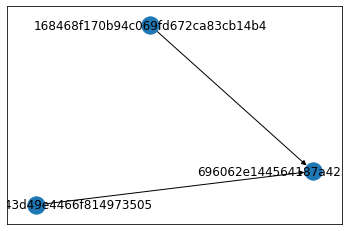

In [25]:
graph.visualize()

In [44]:
list(graph.graph.successors(ago_a.id))[0]

<UID: 696062e144564187a4259f09f794732f>

In [26]:
action

```python
class Action:
  id: str = 696062e144564187a4259f09f794732f
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 1ac2ce6cefa643d49e4466f814973505
  args: str = [<LineageID: 168468f170b94c069fd672ca83cb14b4 - 1439386434612327662>]
  kwargs: str = {}
  result_id: str = ad175ed5e9a34079925976835513f916

```